## Operacje punktowe

#### Kontrast i jasność

Przekształcenie liniowe obrazu daje możliwość wpływania na kontrast i jasnośc obrazu.

$g(x) = \alpha f(x) + \beta$

Parametry $\alpha > 0$ (ang. gain) i $\beta$ (ang. bias) są odpowiedzialne odpowiednio za kontrast (ang. contrast) oraz jasność (ang. brightness).

Mając na uwadze dwuargumentową postać funkcji obrazowej zależną od współrzędnych przestrzennych tę operację można zapisać również jako: 

$g(i,j) = \alpha f(i,j) + \beta$

gdzie współrzędna $i$ oznacza wiersze a współrzędna $j$ kolumny macierzy obrazu.

Operacja może powodować przekroczenie wartości zakresu luminancji tj. $[0, 255]$ lub $[0, 1]$. W takim przypadku wartości wykraczające poza dopuszczalny przedział należy zrzutować na wartości graniczne czyli doknać tzw. normalizacji.

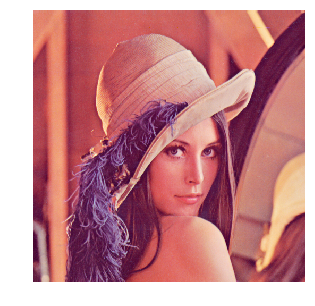

(512, 512, 3) uint8


In [27]:
from skimage import io

url = 'http://www.lenna.org/lena_std.tif'
lena = io.imread(url)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.imshow(lena, cmap="gray")
plt.axis('off')
plt.show()

print(lena.shape, lena.dtype)

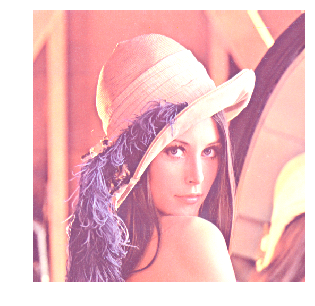

In [28]:
import cv2 

alpha = 1.0
beta = 70.0

mlena = cv2.convertScaleAbs(lena, alpha=alpha, beta=beta)

plt.figure(figsize=(5,5))
plt.imshow(mlena, cmap="gray")
plt.axis('off')
plt.show()

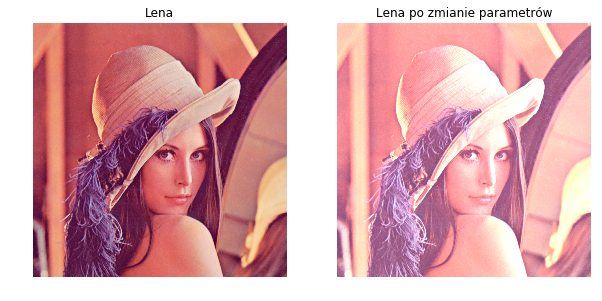

(512, 512, 3) uint8


In [29]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
ax1.imshow(lena, cmap='gray')
ax1.axis('off')
ax1.set_title('Lena')

ax2.imshow(mlena, cmap='gray')
ax2.axis('off')
ax2.set_title('Lena po zmianie parametrów')
plt.show()

print(lena.shape, lena.dtype)

In [30]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):

    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

(303, 384) float64
(303, 384) uint8


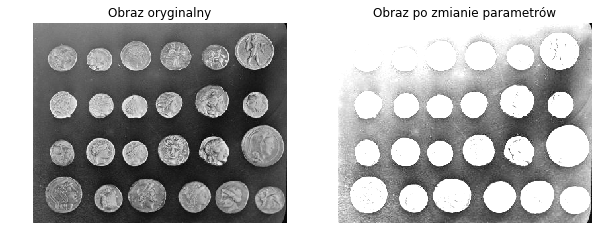

(303, 384) uint8


In [31]:
import warnings
warnings.filterwarnings('ignore')

from skimage import data, img_as_float, img_as_ubyte

im = data.coins()
imf = img_as_float(im)
print(imf.shape, imf.dtype)

imf = img_as_ubyte(imf)
print(imf.shape, imf.dtype)

alpha = 2.5
beta = 10.0
mimf = cv2.convertScaleAbs(imf, alpha=alpha, beta=beta)


show2imgs(imf, mimf, title1='Obraz oryginalny', title2='Obraz po zmianie parametrów', size=(10,10))

print(mimf.shape, mimf.dtype)

#### Korekcja gamma

Przekształcenie potęgowe (ang. Power Law Transform), które w sposób nieliniowy wpływa na wartości luminancji poszczególnych pikseli.

$f(x) = x^\gamma$

Zasady normalnizacji tego przekształcenia są analogiczne jak w przypadku operacji modyfikujące kontrast i jasność. Zwykle parametr $\gamma$ zawiera się w zakresie $[0, 1]$.

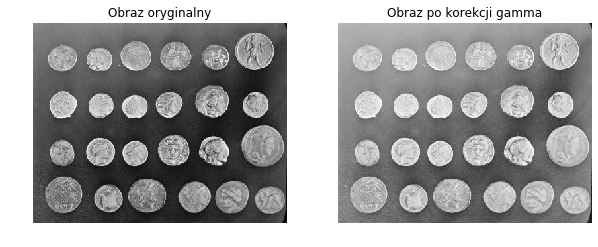

In [32]:
from skimage import exposure

gamma = 0.5
gimf = exposure.adjust_gamma(imf, gamma=gamma)

show2imgs(imf, gimf, title1='Obraz oryginalny', title2='Obraz po korekcji gamma', size=(10,10))

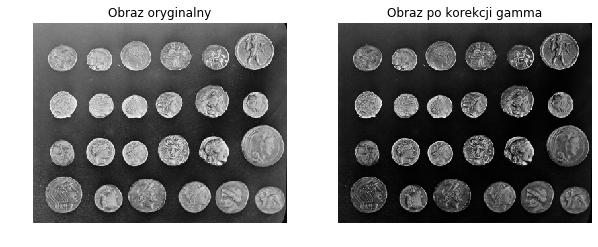

In [33]:
gamma = 2.0
gimf = exposure.adjust_gamma(imf, gamma=gamma)

show2imgs(imf, gimf, title1='Obraz oryginalny', title2='Obraz po korekcji gamma', size=(10,10))